#### Define NN Model Architecture

In [ ]:
nn_model = tf.keras.Sequential([                                                # using TFs Keras API with a Sequential order of layers (sequential execution)
    tf.keras.layers.Dense(                                                      # creating first layer of the model | .Dense(): every neuron is connected to all neurons in previous layer
        units=32,                                                               # units= : layer has 32 neurons (nodes) | inputinput data should have 10 features
        activation='relu',                                                      # activation= : sets the type of the activation function
        input_shape=(10,)),                                                     # input_shape= : has 10 features. Is a tuple -> helpful for multidimensional data

    tf.keras.layers.Dropout(0.5)                                                # randomly chose some nodes & don't train them in this iteration
                                                                                  # prevents overfitting (model learns the training data too well
                                                                                    # -> it begins to capture noise and random fluctuations in the data rather than the underlying patterns)
                                                                                # each neuron in the previous layer connected to the dropout layer has a 50% chance of being temporarily "dropped out"

    tf.keras.layers.Dense(units=32, activation='relu',),                        # no input_shape nedded -> neuronal network does it on its own
    tf.keras.layers.Dense(units=1, activation='sigmoid',)                       # by creating sigmoid activation on our last layer -> prediction projection 0 or 1
])


#### Compile NN Model

In [ ]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),                     # Adam optimizer is a popular optimization algorithm for training neural networks.
                                                                                  # learning rate = 0.001 -> controls the step size during optimization.
                                                                                    # learning rate of 0.001 is often a good starting point -> can be adjusted based on the specific problem and dataset.
    loss='binary_crossentropy',                                                 # loss function: binary_crossentropy is commonly used for binary classification problems
    metrics=['accuracy'])                                                       # metrics for evaluating performance -> accuracy: how often the model's predictions match the true labels


#### Train NN Model

In [ ]:
history = nn_model.fit(
    X_train, y_train, epochs=100,
    batch_size=32,                                                              # batch_size determines how many training examples are used in each iteration during training.
                                                                                  # -> training dataset is divided into batches of 32
    validation_split=0.2,                                                       # validation_split uses 0.2 of the training data set to confirm the results
    verbose=0                                                                   # prohibit printing
)

#### quick check on development of loss and accuracy


In [ ]:
# After compiling a neural network model, the typical workflow in training a machine learning model involves training the model on a dataset for a number of epochs.
# During training, the model's performance is measured using the loss function, and often additional metrics such as accuracy.

import matplotlib.pyplot as plt


def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()


plot_loss(history)
plot_accuracy(history)


##### Ergebnis

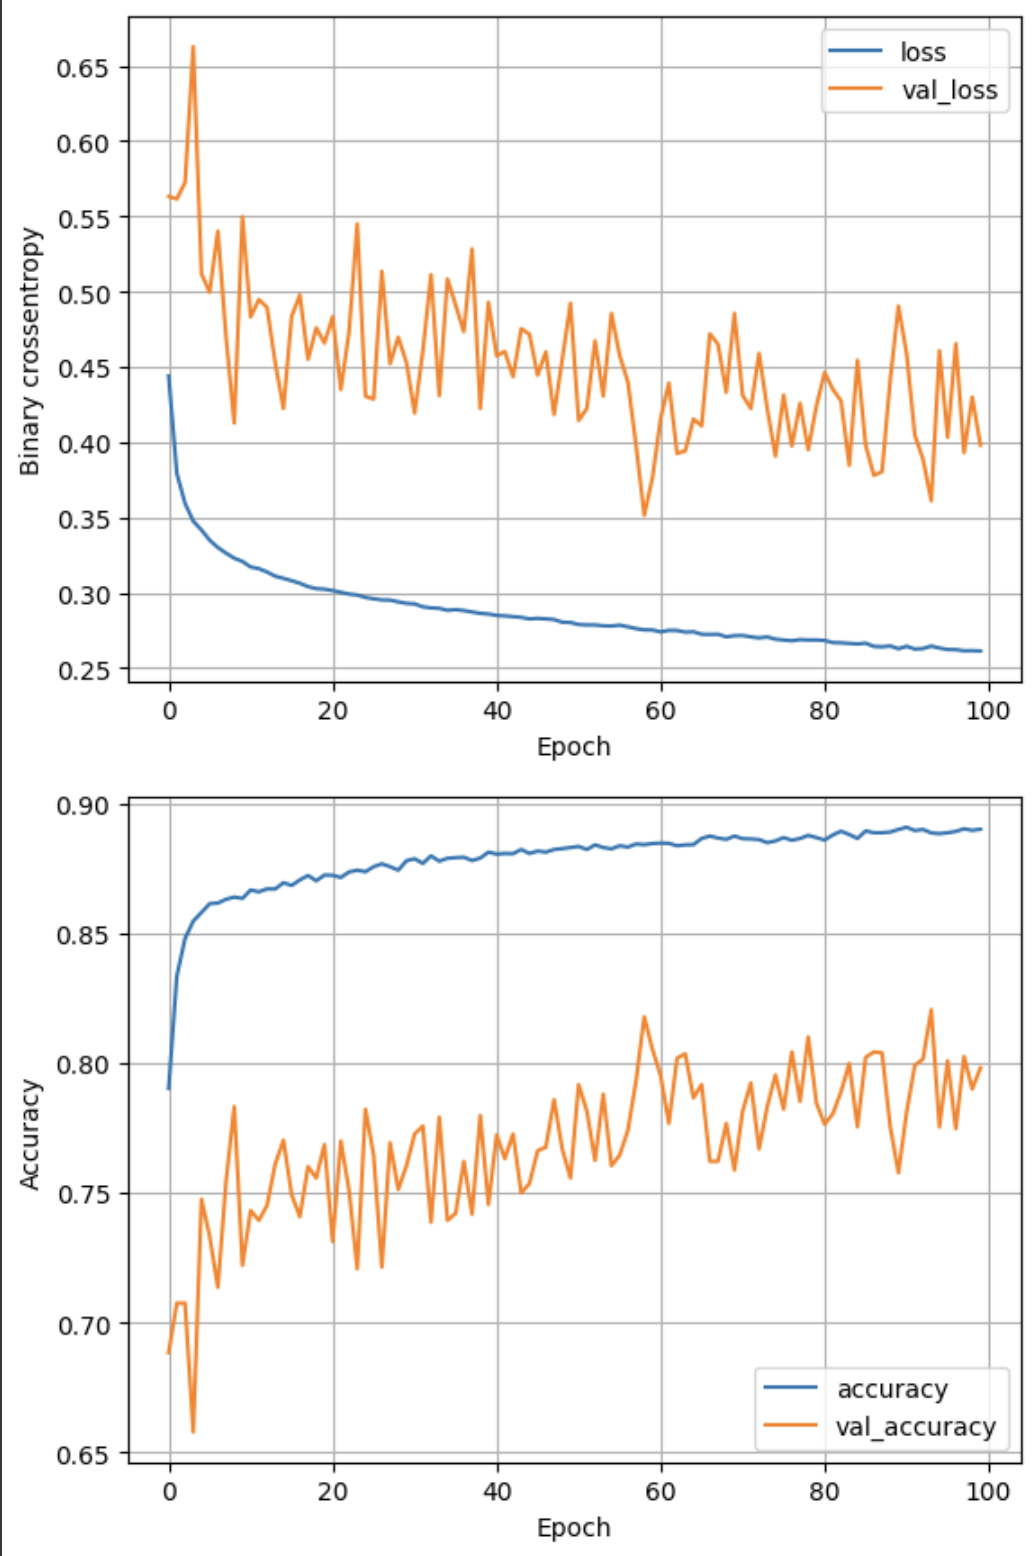

* We hope to achieve a decreasing loss & increasing accuracy (over time)

* it is expected that VALIDATION loss and accuracy performs worse than TRAINING loss and accuracy

 * TRAINING data is used to train & improve the model

 * VALIDATION data was not seen by the model before


